# Setting environment

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pyemma
from pyemma.util.contexts import settings
import mdtraj as md

# Setting trajectory path

In [ ]:
pdb = 'path to folder/1st.pdb'
file ='path to folder/file.dcd'
print(pdb, file)

In [87]:
feat = pyemma.coordinates.featurizer(pdb)
feat.add_backbone_torsions(cossin=True, periodic=False)
torsions_data = pyemma.coordinates.load(file, features=torsions_feat)

labels = ['backbone\ntorsions']

positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_selection(positions_feat.select_Backbone())
positions_data = pyemma.coordinates.load(file, features=positions_feat)

labels += ['backbone atom\npositions']

distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False)
distances_data = pyemma.coordinates.load(file, features=distances_feat)

labels += ['backbone atom\ndistances']

vamp_torsions = pyemma.coordinates.vamp(torsions_data, lag=20, dim=4)
vamp_positions = pyemma.coordinates.vamp(positions_data, lag=20, dim=4)
vamp_distances = pyemma.coordinates.vamp(distances_data, lag=20, dim=4)

In [89]:
vamp_torsions.score(score_method='VAMP1')

4.9402869836235626

In [90]:
vamp_torsions.score(score_method='VAMP2')

4.8816239690784204

In [91]:
vamp_positions.score(score_method='VAMP1')

4.920323081226524

In [92]:
vamp_positions.score(score_method='VAMP2')

4.842299879103702

In [93]:
vamp_distances.score(score_method='VAMP1')

4.996837786713087

In [94]:
vamp_distances.score(score_method='VAMP2')

4.993678227680339

In [95]:
#fig, axes = plt.subplots()
#rectsl = ax.bar([1, 2, 3], [vamp_torsions.score[0]], [vamp_positions.score[0]], [vamp_distances.score[0]],
                #yerr=[vamp_torsions.score[1], vamp_positions.score[1], vamp_distances.score[1]])
#ax.set_ylabel('VAMP score')
#ax.set_xlabel('feature set')
#ax.set_xticks(1, 2, 3)
#ax.set_xticklabels(('torsions', 'positions', 'distances'));

def plot_for_lag(ax, lag, dim=4):
    vamp_torsions.score = pyemma.coordinates.vamp(torsions_data, lag=lag, dim=dim)
    vamp_positions.score = pyemma.coordinates.vamp(positions_data, lag=lag, dim=dim)
    vamp_distances.score = pyemma.coordinates.vamp(distances_data, lag=lag, dim=dim)

    vamps = (vamp_torsions.score, vamp_positions.score, vamp_distances.score)
    test_data = (torsions_data, positions_data, distances_data)
    labels = ('Torsions', 'Positions', 'Distances')
    for i, (v, test_data) in enumerate(zip(vamps, test_data)):
        s = v.score(test_data=test_data)
        ax.bar(i, s)
    ax.set_title('VAMP2 @ lag = {} ns'.format(lag))
    ax.set_xticks(range(len(vamps)))
    ax.set_xticklabels(labels)
    fig.tight_layout()

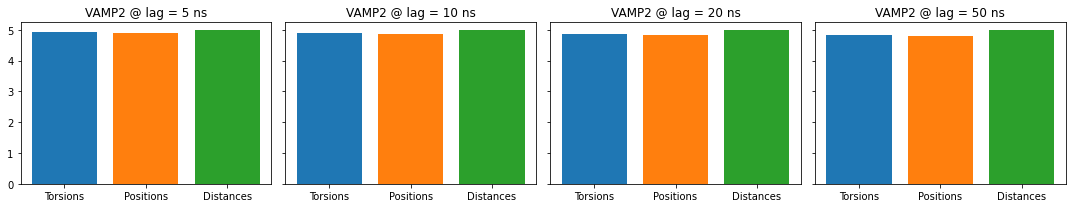

In [96]:
fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharey=True)
plot_for_lag(axes[0], 5)
plot_for_lag(axes[1], 10)
plot_for_lag(axes[2], 20)
plot_for_lag(axes[3], 50)

In [42]:
def show_ic_fel(vamp_torsions):
    ics_files = vamp_torsions.get_output()
    ics = np.concatenate(ics_files)
    pyemma.plots.plot_free_energy(ics[:, 0], ics[:, 1])

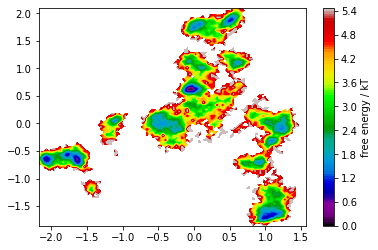

In [43]:
show_ic_fel(vamp_torsions)

In [44]:
def show_ic_fel(vamp_positions):
    ics_files = vamp_positions.get_output()
    ics = np.concatenate(ics_files)
    pyemma.plots.plot_free_energy(ics[:, 0], ics[:, 1])

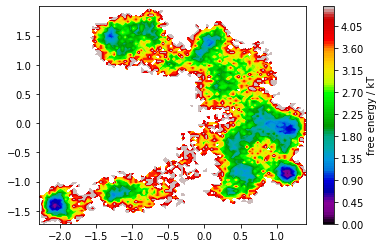

In [45]:
show_ic_fel(vamp_positions)

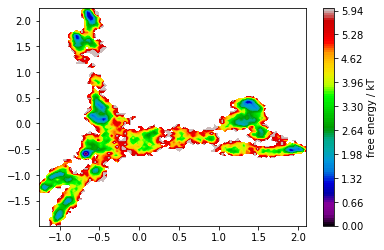

In [46]:
def show_ic_fel(vamp_distances):
    ics_files = vamp_distances.get_output()
    ics = np.concatenate(ics_files)
    pyemma.plots.plot_free_energy(ics[:, 0], ics[:, 1])

show_ic_fel(vamp_distances)

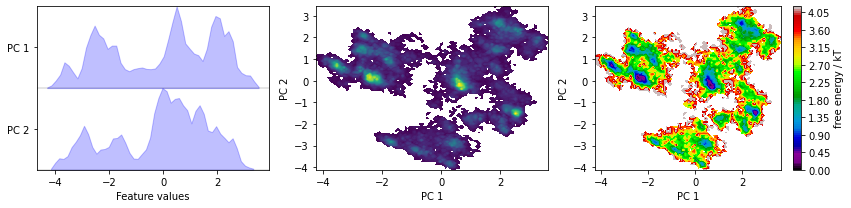

In [78]:
pca = pyemma.coordinates.pca(torsions_data, dim=2)
pca_concatenated = np.concatenate(pca.get_output())

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
pyemma.plots.plot_feature_histograms(
    pca_concatenated,
    ['PC {}'.format(i + 1) for i in range(pca.dimension())],
    ax=axes[0])
pyemma.plots.plot_density(*pca_concatenated[:, :2].T, ax=axes[1], cbar=False)
pyemma.plots.plot_free_energy(*pca_concatenated[:, :2].T, ax=axes[2], legacy=False)
for ax in axes.flat[1:]:
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
fig.tight_layout()

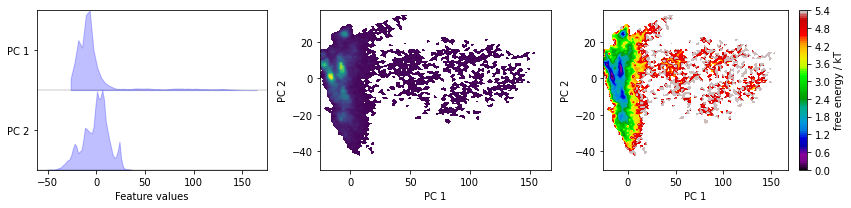

In [79]:
pca = pyemma.coordinates.pca(distances_data, dim=2)
pca_concatenated = np.concatenate(pca.get_output())

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
pyemma.plots.plot_feature_histograms(
    pca_concatenated,
    ['PC {}'.format(i + 1) for i in range(pca.dimension())],
    ax=axes[0])
pyemma.plots.plot_density(*pca_concatenated[:, :2].T, ax=axes[1], cbar=False)
pyemma.plots.plot_free_energy(*pca_concatenated[:, :2].T, ax=axes[2], legacy=False)
for ax in axes.flat[1:]:
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
fig.tight_layout()

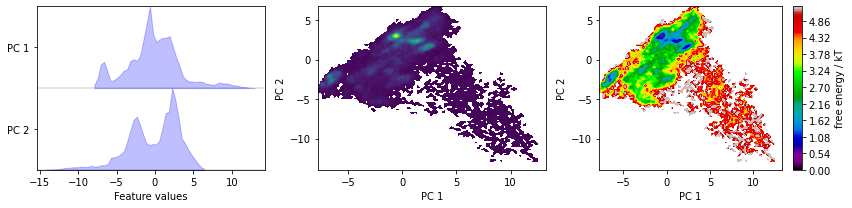

In [80]:
pca = pyemma.coordinates.pca(positions_data, dim=2)
pca_concatenated = np.concatenate(pca.get_output())

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
pyemma.plots.plot_feature_histograms(
    pca_concatenated,
    ['PC {}'.format(i + 1) for i in range(pca.dimension())],
    ax=axes[0])
pyemma.plots.plot_density(*pca_concatenated[:, :2].T, ax=axes[1], cbar=False)
pyemma.plots.plot_free_energy(*pca_concatenated[:, :2].T, ax=axes[2], legacy=False)
for ax in axes.flat[1:]:
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
fig.tight_layout()

In [ ]:
lags = [1, 2, 5, 10, 20, 50]

fig, axes = plt.subplots(6, 3, figsize=(10, 18))
for i, lag in enumerate(lags):
    tica = pyemma.coordinates.tica(torsions_data, lag=lag)
    tica_concatenated = np.concatenate(tica.get_output())
    pyemma.plots.plot_feature_histograms(
        tica_concatenated,
        ['IC {}'.format(i + 1) for i in range(tica.dimension())],
        ax=axes[i, 0])
    axes[i, 0].set_title('lag time = {} steps'.format(lag))
    axes[i, 1].set_title(
        'Density, actual dimension = {}'.format(tica.dimension()))
    pyemma.plots.plot_density(
        *tica_concatenated[:, :2].T, ax=axes[i, 1], cbar=False)
    pyemma.plots.plot_free_energy(
        *tica_concatenated[:, :2].T, ax=axes[i, 2], legacy=False)
for ax in axes[:, 1:].flat:
    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
axes[0, 2].set_title('Pseudo free energy')
fig.tight_layout()

In [ ]:
lags = [1, 2, 5, 10, 20, 50]

fig, axes = plt.subplots(6, 3, figsize=(10, 18))
for i, lag in enumerate(lags):
    tica = pyemma.coordinates.tica(positions_data, lag=lag)
    tica_concatenated = np.concatenate(tica.get_output())
    pyemma.plots.plot_feature_histograms(
        tica_concatenated,
        ['IC {}'.format(i + 1) for i in range(tica.dimension())],
        ax=axes[i, 0])
    axes[i, 0].set_title('lag time = {} steps'.format(lag))
    axes[i, 1].set_title(
        'Density, actual dimension = {}'.format(tica.dimension()))
    pyemma.plots.plot_density(
        *tica_concatenated[:, :2].T, ax=axes[i, 1], cbar=False)
    pyemma.plots.plot_free_energy(
        *tica_concatenated[:, :2].T, ax=axes[i, 2], legacy=False)
for ax in axes[:, 1:].flat:
    ax.set_xlabel('IC 1')
    ax.set_ylabel('IC 2')
axes[0, 2].set_title('Pseudo free energy')
fig.tight_layout()

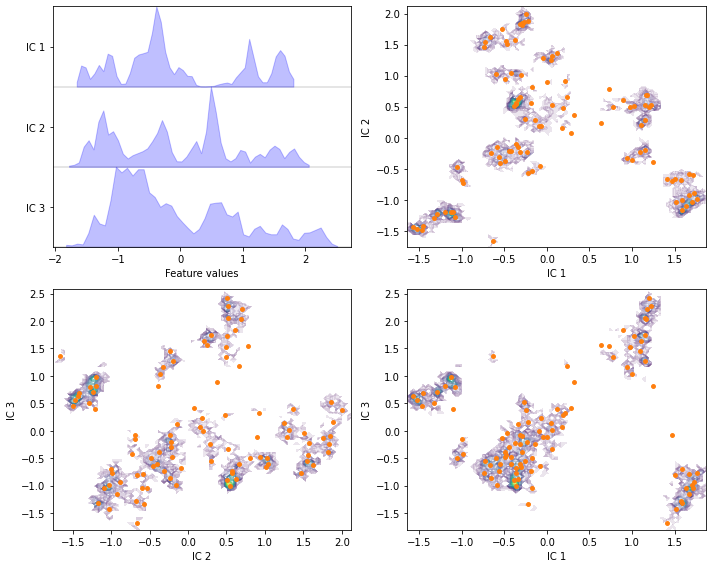

In [84]:
tica = pyemma.coordinates.tica(torsions_data, dim=3)
tica_concatenated = np.concatenate(tica.get_output(stride=5))

cluster = pyemma.coordinates.cluster_kmeans(tica, k=100, max_iter=50, stride=5)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
pyemma.plots.plot_feature_histograms(
    tica_concatenated, ['IC {}'.format(i + 1) for i in range(tica.dimension())], ax=axes[0, 0])
for ax, (i, j) in zip(axes.flat[1:], [[0, 1], [1, 2], [0, 2]]):
    pyemma.plots.plot_density(
        *tica_concatenated[:, [i, j]].T, ax=ax, cbar=False, alpha=0.1)
    ax.scatter(*cluster.clustercenters[:, [i, j]].T, s=15, c='C1')
    ax.set_xlabel('IC {}'.format(i + 1))
    ax.set_ylabel('IC {}'.format(j + 1))
fig.tight_layout()